In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from efficient_apriori import apriori
import efficient_apriori
import pyfpgrowth

In [61]:
file_url_1 = r'G:\\datamining\\data\\Wine Reviews\\winemag-data_first150k.csv'

# 加载数据集
raw_dataframe = pd.read_csv(file_url_1)


# 查看数据数量
print(type(raw_dataframe))
print(raw_dataframe.shape[0])
print(raw_dataframe.shape[1])
feature_name = [column for column in raw_dataframe] 
print(feature_name)
# print(raw_dataframe)
raw_dataframe[:10]

<class 'pandas.core.frame.DataFrame'>
150930
11
['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


缺失部分剔除后数据行数: 39241


,country,winery,points
0,US,Heitz,"(95, 100]"
2,US,Macauley,"(95, 100]"
3,US,Ponzi,"(95, 100]"
8,US,Bergström,"(90, 95]"
9,US,Blue Farm,"(90, 95]"
11,US,Patricia Green Cellars,"(90, 95]"
12,US,Patricia Green Cellars,"(90, 95]"
14,US,Domaine Serene,"(90, 95]"
15,US,Bergström,"(90, 95]"
16,US,Hall,"(90, 95]"


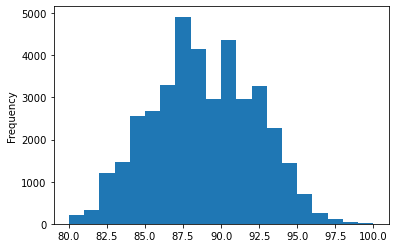

In [21]:
#分析葡萄酒产地 品种 价格三个属性
# 将缺失部分剔除
dataframe_1 = raw_dataframe.dropna()

dataframe_1['points'].plot.hist(bins=20)
points_values = [50,55,60,65,70,75, 80, 85,90,95,100]
dataframe_1['points'] = pd.cut(dataframe_1['points'],points_values)
dataframe_1['points'] = dataframe_1['points'].astype('str')
dataframe_1['points'].value_counts()
dataframe_1.head()

data = dataframe_1[[ 'country', 'winery', 'points']]
data = data.dropna(how='any')
print('缺失部分剔除后数据行数:', len(data))
data[:10]

In [54]:
count_data = []
for _, (country, winery,point) in data.iterrows():
    count_data.append(( country, winery,points))
#利用aprori算法进行频繁算法
items, rules = apriori(count_data, min_support=0.001,  min_confidence=0.4)
items

{1: {('US',): 39241,
  ('(95, 100]',): 39241,
  ('Ponzi',): 52,
  ('Domaine Serene',): 56,
  ('Gary Farrell',): 132,
  ('Saviah',): 41,
  ('Buty',): 59,
  ('DeLille',): 64,
  ('Dr. Konstantin Frank',): 43,
  ('Efeste',): 43,
  ('Panther Creek',): 54,
  ('Raymond',): 101,
  ('EOS',): 83,
  ('Charles Krug',): 47,
  ('MacPhail',): 73,
  ('Renwood',): 93,
  ('Trinchero',): 50,
  ('Peachy Canyon',): 108,
  ('Eberle',): 72,
  ('Cameron Hughes',): 143,
  ('Siduri',): 73,
  ('Syncline',): 53,
  ('Heron Hill',): 63,
  ('Sparkman',): 53,
  ('St. Supéry',): 55,
  ('Testarossa',): 264,
  ('Adelaida',): 108,
  ('Failla',): 80,
  ('J Vineyards & Winery',): 62,
  ('De Loach',): 157,
  ('Sbragia',): 70,
  ('Schramsberg',): 72,
  ('Bernardus',): 90,
  ('Anam Cara',): 48,
  ('Martin Ray',): 90,
  ('Sanguis',): 40,
  ('Lafond',): 45,
  ('Lynmar',): 87,
  ('Byron',): 51,
  ('Easton',): 62,
  ('Soléna',): 49,
  ('Babcock',): 71,
  ('Rusack',): 48,
  ('Beauregard',): 40,
  ('Balletto',): 49,
  ('David Hill'

In [56]:
#计算其支持度和置信度
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'support:', rule.support, 'confidence:', rule.confidence,"\n")

{:Nota Bene} -> {(95, 100]} support: 0.0010957926658342041 confidence: 1.0 

{Adelaida} -> {(95, 100]} support: 0.0027522234397696285 confidence: 1.0 

{Adelsheim} -> {(95, 100]} support: 0.0019622333783542723 confidence: 1.0 

{Airfield Estates} -> {(95, 100]} support: 0.0015544965724624755 confidence: 1.0 

{Alexander Valley Vineyards} -> {(95, 100]} support: 0.0015544965724624755 confidence: 1.0 

{Alexandria Nicole} -> {(95, 100]} support: 0.0011212762162024414 confidence: 1.0 

{Amador Foothill Winery} -> {(95, 100]} support: 0.0010703091154659666 confidence: 1.0 

{Ampelos} -> {(95, 100]} support: 0.001019342014729492 confidence: 1.0 

{Anam Cara} -> {(95, 100]} support: 0.0012232104176753906 confidence: 1.0 

{Andrew Will} -> {(95, 100]} support: 0.001758364975408374 confidence: 1.0 

{Arbor Crest} -> {(95, 100]} support: 0.0011977268673071533 confidence: 1.0 

{Arista} -> {(95, 100]} support: 0.0014015952702530518 confidence: 1.0 

{Arrowood} -> {(95, 100]} support: 0.001019342

{(95, 100], Carr} -> {US} support: 0.0011977268673071533 confidence: 1.0 

{Carr} -> {(95, 100], US} support: 0.0011977268673071533 confidence: 1.0 

{Castoro Cellars, US} -> {(95, 100]} support: 0.0010957926658342041 confidence: 1.0 

{(95, 100], Castoro Cellars} -> {US} support: 0.0010957926658342041 confidence: 1.0 

{Castoro Cellars} -> {(95, 100], US} support: 0.0010957926658342041 confidence: 1.0 

{Cayuse, US} -> {(95, 100]} support: 0.0013761117198848143 confidence: 1.0 

{(95, 100], Cayuse} -> {US} support: 0.0013761117198848143 confidence: 1.0 

{Cayuse} -> {(95, 100], US} support: 0.0013761117198848143 confidence: 1.0 

{Chalk Hill, US} -> {(95, 100]} support: 0.0012741775184118651 confidence: 1.0 

{(95, 100], Chalk Hill} -> {US} support: 0.0012741775184118651 confidence: 1.0 

{Chalk Hill} -> {(95, 100], US} support: 0.0012741775184118651 confidence: 1.0 

{Chandon, US} -> {(95, 100]} support: 0.0013251446191483397 confidence: 1.0 

{(95, 100], Chandon} -> {US} support: 0.

{Tolosa, US} -> {(95, 100]} support: 0.0023190030835095947 confidence: 1.0 

{(95, 100], Tolosa} -> {US} support: 0.0023190030835095947 confidence: 1.0 

{Tolosa} -> {(95, 100], US} support: 0.0023190030835095947 confidence: 1.0 

{Trinchero, US} -> {(95, 100]} support: 0.0012741775184118651 confidence: 1.0 

{(95, 100], Trinchero} -> {US} support: 0.0012741775184118651 confidence: 1.0 

{Trinchero} -> {(95, 100], US} support: 0.0012741775184118651 confidence: 1.0 

{US, V. Sattui} -> {(95, 100]} support: 0.0016564307739354246 confidence: 1.0 

{(95, 100], V. Sattui} -> {US} support: 0.0016564307739354246 confidence: 1.0 

{V. Sattui} -> {(95, 100], US} support: 0.0016564307739354246 confidence: 1.0 

{US, Vin du Lac} -> {(95, 100]} support: 0.0012741775184118651 confidence: 1.0 

{(95, 100], Vin du Lac} -> {US} support: 0.0012741775184118651 confidence: 1.0 

{Vin du Lac} -> {(95, 100], US} support: 0.0012741775184118651 confidence: 1.0 

{US, Vina Robles} -> {(95, 100]} support: 0.00

In [58]:
#使用Lift、卡方对规则进行评价
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'lift:', rule.lift, 'conviction:', rule.conviction,"\n")

{:Nota Bene} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Adelaida} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Adelsheim} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Airfield Estates} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Alexander Valley Vineyards} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Alexandria Nicole} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Amador Foothill Winery} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Ampelos} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Anam Cara} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Andrew Will} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Arbor Crest} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Arista} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Arrowood} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Artesa} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Babcock} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Baileyana} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Ballentine} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{Balletto} -> {(95, 100]} 

{Charles Krug, US} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Charles Krug} -> {US} lift: 1.0 conviction: 0.0 

{Charles Krug} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{Chateau St. Jean, US} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Chateau St. Jean} -> {US} lift: 1.0 conviction: 0.0 

{Chateau St. Jean} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{Chateau Ste. Michelle, US} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Chateau Ste. Michelle} -> {US} lift: 1.0 conviction: 0.0 

{Chateau Ste. Michelle} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{Chehalem, US} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Chehalem} -> {US} lift: 1.0 conviction: 0.0 

{Chehalem} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{Chimney Rock, US} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Chimney Rock} -> {US} lift: 1.0 conviction: 0.0 

{Chimney Rock} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{Claudia Springs, US} -> {(95, 100]} lift: 

{Wellington} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{US, Wente} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Wente} -> {US} lift: 1.0 conviction: 0.0 

{Wente} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{US, Willamette Valley Vineyards} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Willamette Valley Vineyards} -> {US} lift: 1.0 conviction: 0.0 

{Willamette Valley Vineyards} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{US, Williams Selyem} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Williams Selyem} -> {US} lift: 1.0 conviction: 0.0 

{Williams Selyem} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{US, Wilson} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Wilson} -> {US} lift: 1.0 conviction: 0.0 

{Wilson} -> {(95, 100], US} lift: 1.0 conviction: 0.0 

{US, Zaca Mesa} -> {(95, 100]} lift: 1.0 conviction: 0.0 

{(95, 100], Zaca Mesa} -> {US} lift: 1.0 conviction: 0.0 

{Zaca Mesa} -> {(95, 100], US} lift: 1.0 conviction: 0.0 



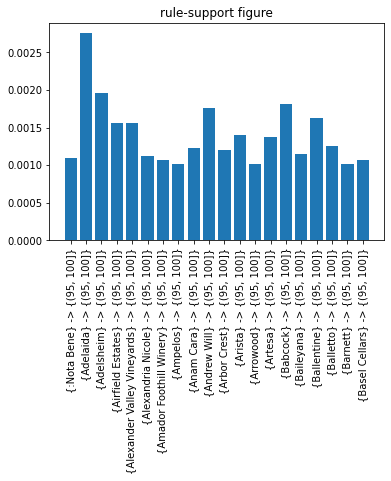

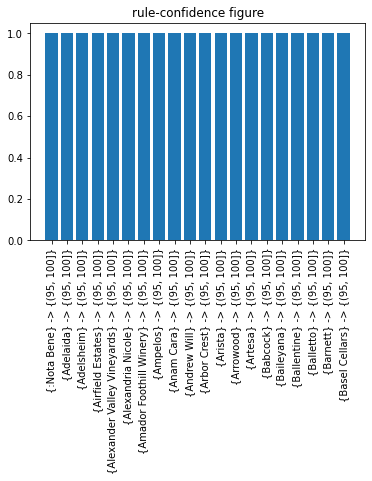

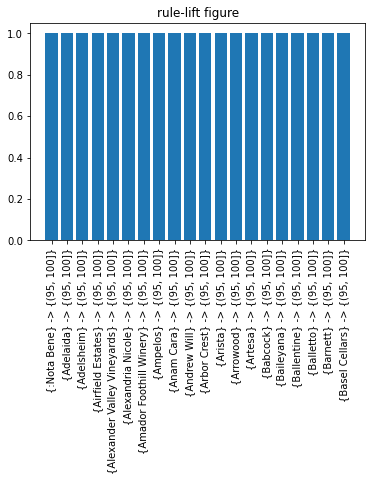

In [59]:
#规则可视化

def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)),rules,rotation=90)
    plt.bar(range(len(data)), data)
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for rule in big_rule_list:
        rules.append(repr(rule))
        conf.append(rule.confidence)
        support.append(rule.support)
        lift.append(rule.lift)
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

visualization(sorted(rules, key=lambda rule: rule.confidence)[:20])